In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("processed_headlines_locations.csv")

In [3]:
data

,Unnamed: 0,headline,city,accented_city,latitude,longitude,countrycode,pop
0,0,Zika Outbreak Hits Miami,Miami,Miami,25.77427,-80.19366,US,441003.0
1,1,Could Zika Reach New York City?,New York City,New York City,40.71427,-74.00597,US,8175133.0
2,2,First Case of Zika in Miami Beach,Miami Beach,Miami Beach,25.79065,-80.13005,US,92312.0
3,3,"Mystery Virus Spreads in Recife, Brazil",Recife,Recife,-8.05389,-34.88111,BR,1478098.0
4,4,Dallas man comes down with case of Zika,Dallas,Dallas,32.78306,-96.80667,US,1300092.0
...,...,...,...,...,...,...,...,...
600,642,Rumors about Rabies spreading in Jerusalem hav...,Jerusalem,Jerusalem,31.76904,35.21633,IL,801000.0
601,643,More Zika patients reported in Indang,Indang,Indang,14.19528,120.87694,PH,41159.0
602,644,Suva authorities confirmed the spread of Rotav...,Suva,Suva,-18.14161,178.44149,FJ,77366.0
603,645,More Zika patients reported in Bella Vista,Bella Vista,Bella Vista,18.45539,-69.94540,DO,175683.0


In [4]:
import numpy as np
np.random.seed(0)
mean = 0
variance = 2
x = np.random.normal(mean, variance ** 0.5)
y = np.random.normal(mean, variance ** 0.5)
print(f"The x coordinate of a randomly thrown dart is {x:.2f}")
print(f"The y coordinate of a randomly thrown dart is {y:.2f}")

The x coordinate of a randomly thrown dart is 2.49
The y coordinate of a randomly thrown dart is 0.57


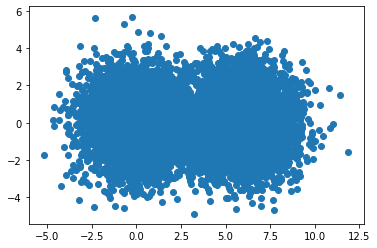

In [5]:
import matplotlib.pyplot as plt
np.random.seed(1)
bulls_eye1 = [0, 0]
bulls_eye2 = [6, 0]
bulls_eyes = [bulls_eye1, bulls_eye2]
x_coordinates, y_coordinates = [], []
for bulls_eye in bulls_eyes:
    for _ in range(5000):
        x = np.random.normal(bulls_eye[0], variance ** 0.5)
        y = np.random.normal(bulls_eye[1], variance ** 0.5)
        x_coordinates.append(x)
        y_coordinates.append(y)

plt.scatter(x_coordinates, y_coordinates)
plt.show()

In [6]:
from scipy.spatial.distance import euclidean
def nearest_bulls_eye(dart):
    distances = [euclidean(dart, bulls_e) for bulls_e in bulls_eyes]
    return np.argmin(distances)

darts = [[0,1], [6, 1]]
for dart in darts:
    index = nearest_bulls_eye(dart)
    print(f"The dart at position {dart} is closest to bulls-eye {index}")

The dart at position [0, 1] is closest to bulls-eye 0
The dart at position [6, 1] is closest to bulls-eye 1


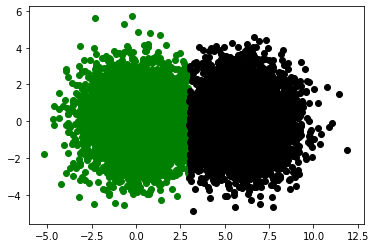

In [7]:
def color_by_cluster(darts):
    nearest_bulls_eyes = [nearest_bulls_eye(dart) for dart in darts]
    for bs_index in range(len(bulls_eyes)):
        selected_darts = [darts[i] for i in range(len(darts))
                          if bs_index == nearest_bulls_eyes[i]]
        x_coordinates, y_coordinates = np.array(selected_darts).T
        plt.scatter(x_coordinates, y_coordinates,
                    color=['g', 'k'][bs_index])
    plt.show()

darts = [[x_coordinates[i], y_coordinates[i]]
         for i in range(len(x_coordinates))]
color_by_cluster(darts)

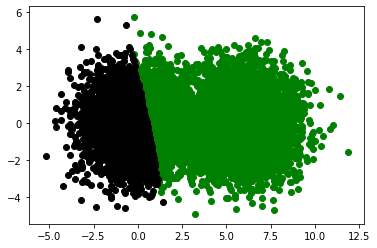

In [8]:
bulls_eyes = np.array(darts[:2])
color_by_cluster(darts)

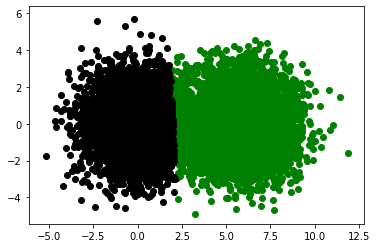

In [9]:
def update_bulls_eyes(darts):
    updated_bulls_eyes = []
    nearest_bulls_eyes = [nearest_bulls_eye(dart) for dart in darts]
    for bs_index in range(len(bulls_eyes)):
        selected_darts = [darts[i] for i in range(len(darts))
                          if bs_index == nearest_bulls_eyes[i]]
        x_coordinates, y_coordinates = np.array(selected_darts).T
        mean_center = [np.mean(x_coordinates), np.mean(y_coordinates)]
        updated_bulls_eyes.append(mean_center)

    return updated_bulls_eyes

bulls_eyes = update_bulls_eyes(darts)
color_by_cluster(darts)

In [10]:
from sklearn.cluster import KMeans

In [11]:
cluster_model = KMeans(n_clusters=2)
assigned_bulls_eyes = cluster_model.fit_predict(darts)

print("Bull's-eye assignments:")
print(assigned_bulls_eyes)

Bull's-eye assignments:
[1 1 1 ... 0 0 0]


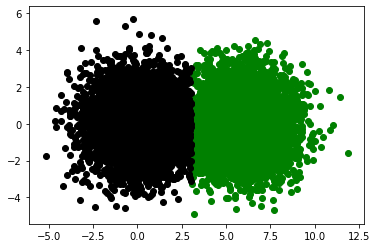

In [12]:
for bs_index in range(len(bulls_eyes)):
    selected_darts = [darts[i] for i in range(len(darts))
                      if bs_index == assigned_bulls_eyes[i]]
    x_coordinates, y_coordinates = np.array(selected_darts).T
    plt.scatter(x_coordinates, y_coordinates,
                color=['g', 'k'][bs_index])
plt.show()

In [13]:
new_darts = [[500, 500], [-500, -500]]
new_bulls_eye_assignments = cluster_model.predict(new_darts)
for i, dart in enumerate(new_darts):
    bulls_eye_index = new_bulls_eye_assignments[i]
    print(f"Dart at {dart} is closest to bull's-eye {bulls_eye_index}")

Dart at [500, 500] is closest to bull's-eye 0
Dart at [-500, -500] is closest to bull's-eye 1


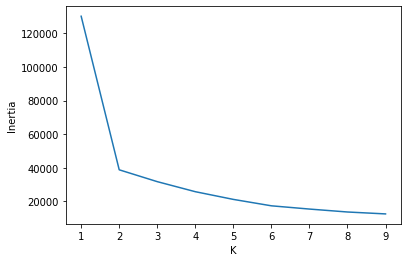

In [14]:
k_values = range(1, 10)
inertia_values = [KMeans(k).fit(darts).inertia_
                  for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

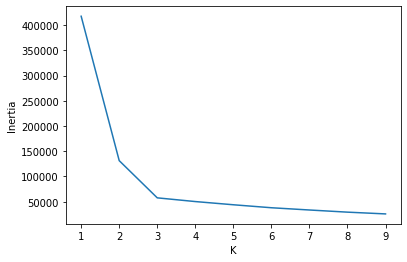

In [15]:
new_bulls_eye = [12, 0]
for _ in range(5000):
    x = np.random.normal(new_bulls_eye[0], variance ** 0.5)
    y = np.random.normal(new_bulls_eye[1], variance ** 0.5)
    darts.append([x, y])

inertia_values = [KMeans(k).fit(darts).inertia_
                  for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

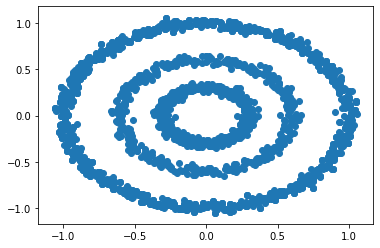

In [16]:
from sklearn.datasets import make_circles

x_coordinates = []
y_coordinates = []
for factor in [.3, .6, 0.99]:
    rock_ring, _ = make_circles(n_samples=800, factor=factor,
                                noise=.03, random_state=1)
    for rock in rock_ring:
        x_coordinates.append(rock[0])
        y_coordinates.append(rock[1])

plt.scatter(x_coordinates, y_coordinates)
plt.show()

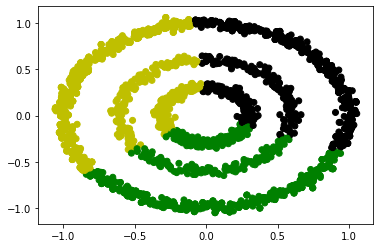

In [17]:
rocks = [[x_coordinates[i], y_coordinates[i]]
          for i in range(len(x_coordinates))]
rock_clusters = KMeans(3).fit_predict(rocks)

colors = [['g', 'y', 'k'][cluster] for cluster in  rock_clusters]
plt.scatter(x_coordinates, y_coordinates, color=colors)
plt.show()

In [18]:
epsilon=0.1
min_points = 10

In [19]:
neighbor_indices = [i for i, rock in enumerate(rocks[1:])
                    if euclidean(rocks[0], rock) <= epsilon]

In [20]:
num_neighbors = len(neighbor_indices)
print(f"The rock at index 0 has {num_neighbors} neighbors.")

if num_neighbors >= min_points:
    print("It lies in a dense region.")
else:
    print("It does not lie in a dense region.")

The rock at index 0 has 40 neighbors.
It lies in a dense region.


In [23]:
dense_region_indices = [0] + neighbor_indices
dense_region_cluster = [rocks[i] for i in dense_region_indices]
dense_cluster_size = len(dense_region_cluster)
print(f"We found a dense cluster containing {dense_cluster_size} rocks")

We found a dense cluster containing 41 rocks


In [24]:
dense_region_indices = set(dense_region_indices)
for index in neighbor_indices:
    point = rocks[index]
    neighbors_of_neighbors = [i for i, rock in enumerate(rocks)
                              if euclidean(point, rock) <= epsilon]
    if len(neighbors_of_neighbors) >= min_points:
        dense_region_indices.update(neighbors_of_neighbors)

dense_region_cluster = [rocks[i] for i in dense_region_indices]
dense_cluster_size = len(dense_region_cluster)
print(f"We expanded our cluster to include {dense_cluster_size} rocks")

We expanded our cluster to include 781 rocks


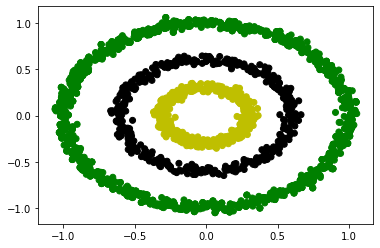

In [25]:
from sklearn.cluster import DBSCAN
cluster_model = DBSCAN(eps=epsilon, min_samples=min_points)
rock_clusters = cluster_model.fit_predict(rocks)
colors = [['g', 'y', 'k'][cluster] for cluster in rock_clusters]
plt.scatter(x_coordinates, y_coordinates, color=colors)
plt.show()

In [26]:
noisy_data = rocks + [[1000, -1000]]
clusters = DBSCAN(eps=epsilon,
                  min_samples=min_points).fit_predict(noisy_data)
assert clusters[-1] == -1

In [27]:
def manhattan_distance(point_a, point_b):
    num_blocks = np.sum(np.absolute(point_a - point_b))
    return .17 * num_blocks

x = np.array([34, 5])
y = np.array([57, 8])
distance = manhattan_distance(x, y)

print(f"Manhattan distance is {distance} miles")

Manhattan distance is 4.42 miles


Point at index 0 is in cluster 0
Point at index 1 is in cluster 0
Point at index 2 is in cluster 0
Point at index 3 is an outlier
Point at index 4 is an outlier


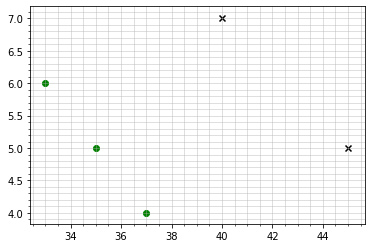

In [28]:
points = [[35, 5], [33, 6], [37, 4], [40, 7], [45, 5]]
clusters = DBSCAN(eps=1, min_samples=3,
                  metric=manhattan_distance).fit_predict(points)

for i, cluster in enumerate(clusters):
    point = points[i]
    if cluster == -1:
        print(f"Point at index {i} is an outlier")
        plt.scatter(point[0], point[1], marker='x', color='k')
    else:
        print(f"Point at index {i} is in cluster {cluster}")
        plt.scatter(point[0], point[1], color='g')

plt.grid(True, which='both', alpha=0.5)
plt.minorticks_on()


plt.show()

In [29]:
def ridiculous_measure(point_a, point_b):
    is_negative_a = np.array(point_a) < 0
    is_negative_b = np.array(point_b) < 0
    if is_negative_a.all() and is_negative_b.all():
        return 0
    elif is_negative_a.any() and is_negative_b.any():
        return 10
    else:
        return 2

points = [[-1, -1], [-10, -10], [-1000, -13435], [3,5], [5,-7]]

clusters = DBSCAN(eps=.1, min_samples=2,
                  metric=ridiculous_measure).fit_predict(points)

for i, cluster in enumerate(clusters):
    point = points[i]
    if cluster == -1:
        print(f"{point} is an outlier")
    else:
        print(f"{point} falls in cluster {cluster}")

[-1, -1] falls in cluster 0
[-10, -10] falls in cluster 0
[-1000, -13435] falls in cluster 0
[3, 5] is an outlier
[5, -7] is an outlier


In [30]:
import pandas as pd
x_coordinates, y_coordinates = np.array(rocks).T
df = pd.DataFrame({'X': x_coordinates, 'Y': y_coordinates,
                   'Cluster': rock_clusters})

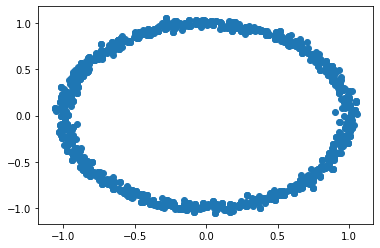

In [31]:
df_cluster = df[df.Cluster == 0]
plt.scatter(df_cluster.X, df_cluster.Y)
plt.show()

Skipping over cluster 0
Plotting cluster 1
Plotting cluster 2


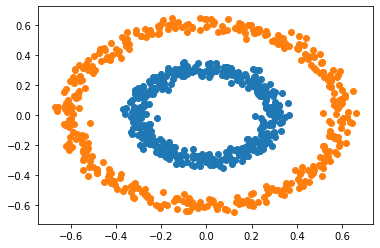

In [32]:
for cluster_id, df_cluster in df.groupby('Cluster'):
    if cluster_id == 0:
        print(f"Skipping over cluster {cluster_id}")
        continue

    print(f"Plotting cluster {cluster_id}")
    plt.scatter(df_cluster.X, df_cluster.Y)


plt.show()

In [1]:
from mpl_toolkits.basemap import Basemap
map_plotter = Basemap()

C:\Users\Kelvin Ng\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


In [2]:
fig = plt.figure(figsize=(12, 8))
map_plotter.drawcoastlines()
plt.show()

NameError: name 'plt' is not defined

In [3]:
fig = plt.figure(figsize=(12, 8))
map_plotter.drawcoastlines()
map_plotter.drawcountries()
plt.show()

NameError: name 'plt' is not defined

In [4]:
fig = plt.figure(figsize=(12, 8))
map_plotter.shadedrelief()
plt.show()

NameError: name 'plt' is not defined

In [5]:
fig = plt.figure(figsize=(12, 8))
coordinates = [(39.9526, -75.1652), (37.7749, -122.4194),
               (40.4406, -79.9959), (38.6807, -108.9769),
               (37.8716, -112.2727), (40.7831, -73.9712)]

latitudes, longitudes = np.array(coordinates).T
map_plotter.scatter(longitudes, latitudes, latlon=True)
map_plotter.shadedrelief()
plt.show()

NameError: name 'plt' is not defined

In [6]:
fig = plt.figure(figsize=(12, 8))
map_ortho = Basemap(projection='ortho', lat_0=40, lon_0=-95)
map_ortho.scatter(longitudes, latitudes, latlon=True,
                  s=70)
map_ortho.drawcoastlines()
plt.show()

NameError: name 'plt' is not defined

In [7]:
fig = plt.figure(figsize=(12, 8))
map_lcc = Basemap(projection='lcc', lon_0=-95, llcrnrlon=-119,
                  llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, lat_1=33,
                  lat_2=45)

map_lcc.scatter(longitudes, latitudes, latlon=True, s=70)
map_lcc.drawcoastlines()
plt.show()

NameError: name 'plt' is not defined

In [8]:
fig = plt.figure(figsize=(12, 8))
map_lcc.scatter(longitudes, latitudes, latlon=True, s=70)
map_lcc.drawcoastlines()
map_lcc.drawstates()
plt.show()

NameError: name 'plt' is not defined

C:\Users\Kelvin Ng\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


NameError: name 'plt' is not defined